### UPenn and Mayo Clinic's Seizure Detection Challenge

Goal: Detect seizures in intracranial EEG recordings
https://www.kaggle.com/c/seizure-detection/overview/description

In [1]:
import os
import struct
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data
import platform

plat = platform.system()
if plat=='Windows':
    os.chdir("C:\\Users\\mmado\\Downloads\\MLProject\\seizure_dataset")
    cwd = os.getcwd()
    sample_clip = loadmat(cwd + '\\sample_clip.mat')
else:
    os.chdir('/Users/malvernmadondo/Downloads/Emory/spring20/ml/seizure_dataset')
    cwd = os.getcwd()
    sample_clip = loadmat(cwd + '/sample_clip.mat')

In [3]:
def loadData(matlabFile):
    matlabDict = loadmat(matlabFile)
    lat = matlabDict['latency'][0]
    freq = len(matlabDict['data'][0])
    data = pd.DataFrame({'time':np.arange(lat,1.0+lat,1.0/freq)})
    channels = ['chan1','chan2','chan3','chan4','chan5','chan6','chan7','chan8','chan9','chan10','chan11','chan12','chan13','chan14','chan15','chan16']
    for i in range(len(matlabDict['channels'][0][0])):
        data[channels[i]] = matlabDict['data'][i]
    return data

In [4]:
sample_df = loadData('sample_clip.mat')
print(sample_df.shape)

(400, 17)


In [5]:
sample_df.describe()

,time,chan1,chan2,chan3,chan4,chan5,chan6,chan7,chan8,chan9,chan10,chan11,chan12,chan13,chan14,chan15,chan16
count,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,0.498750,-7.774226e-14,-6.046719e-14,3.439027e-14,6.330936e-14,3.634426e-14,-5.098144e-14,-2.710721e-14,2.955858e-14,2.891909e-14,2.787104e-14,-2.991385e-14,-1.184830e-14,-6.917134e-14,-2.007283e-14,7.815970e-15,-9.276135e-14
std,0.289036,4.908538e+01,4.827557e+01,6.528840e+01,5.333736e+01,3.943409e+01,3.917581e+01,4.093477e+01,6.215499e+01,7.942600e+01,7.410416e+01,5.939531e+01,3.612270e+01,9.709688e+01,7.486863e+01,4.981900e+01,7.309093e+01
min,0.000000,-1.348225e+02,-1.355150e+02,-1.835350e+02,-1.550325e+02,-1.179800e+02,-1.107075e+02,-1.172100e+02,-1.104800e+02,-2.044550e+02,-1.203525e+02,-1.092150e+02,-1.020075e+02,-1.471825e+02,-1.339200e+02,-1.262825e+02,-1.345375e+02
25%,0.249375,-1.782250e+01,-1.876500e+01,-2.478500e+01,-2.503250e+01,-1.998000e+01,-2.095750e+01,-2.021000e+01,-4.248000e+01,-4.045500e+01,-4.035250e+01,-3.846500e+01,-2.400750e+01,-6.518250e+01,-4.892000e+01,-3.353250e+01,-4.478750e+01
50%,0.498750,5.177500e+00,6.985000e+00,1.346500e+01,3.967500e+00,6.520000e+00,7.292500e+00,4.790000e+00,-1.048000e+01,1.254500e+01,-2.035250e+01,-1.071500e+01,2.992500e+00,-1.268250e+01,-1.492000e+01,-3.282500e+00,-1.753750e+01
75%,0.748125,3.317750e+01,2.873500e+01,4.546500e+01,3.321750e+01,2.827000e+01,2.829250e+01,2.679000e+01,3.052000e+01,5.854500e+01,4.897500e+00,2.928500e+01,2.699250e+01,3.206750e+01,2.133000e+01,3.771750e+01,1.846250e+01
max,0.997500,9.817750e+01,9.648500e+01,1.094650e+02,1.199675e+02,8.902000e+01,7.029250e+01,1.587900e+02,1.735200e+02,1.475450e+02,2.136475e+02,1.987850e+02,8.099250e+01,3.158175e+02,2.200800e+02,1.397175e+02,2.004625e+02


In [6]:
sample_df.head(5)

,time,chan1,chan2,chan3,chan4,chan5,chan6,chan7,chan8,chan9,chan10,chan11,chan12,chan13,chan14,chan15,chan16
0,0.0000,45.1775,8.485,45.465,27.9675,-48.98,-47.7075,33.79,112.52,99.545,-93.3525,19.785,38.9925,-112.1825,-128.92,-1.2825,9.4625
1,0.0025,42.1775,18.485,44.465,14.9675,-34.98,-49.7075,21.79,128.52,83.545,-90.3525,-0.215,39.9925,-95.1825,-127.92,4.7175,-1.5375
2,0.0050,32.1775,33.485,55.465,4.9675,-30.98,-37.7075,19.79,141.52,46.545,-82.3525,-0.215,45.9925,-96.1825,-133.92,9.7175,-16.5375
3,0.0075,37.1775,48.485,63.465,17.9675,-21.98,-25.7075,16.79,153.52,3.545,-83.3525,-0.215,42.9925,-120.1825,-133.92,26.7175,-23.5375
4,0.0100,44.1775,62.485,52.465,19.9675,-21.98,-35.7075,6.79,144.52,-9.455,-78.3525,-10.215,40.9925,-122.1825,-118.92,39.7175,-17.5375


### Visualize sample clips

In [7]:
channels = ['chan1','chan2','chan3','chan4','chan5','chan6','chan7','chan8','chan9','chan10','chan11','chan12','chan13','chan14','chan15','chan16']

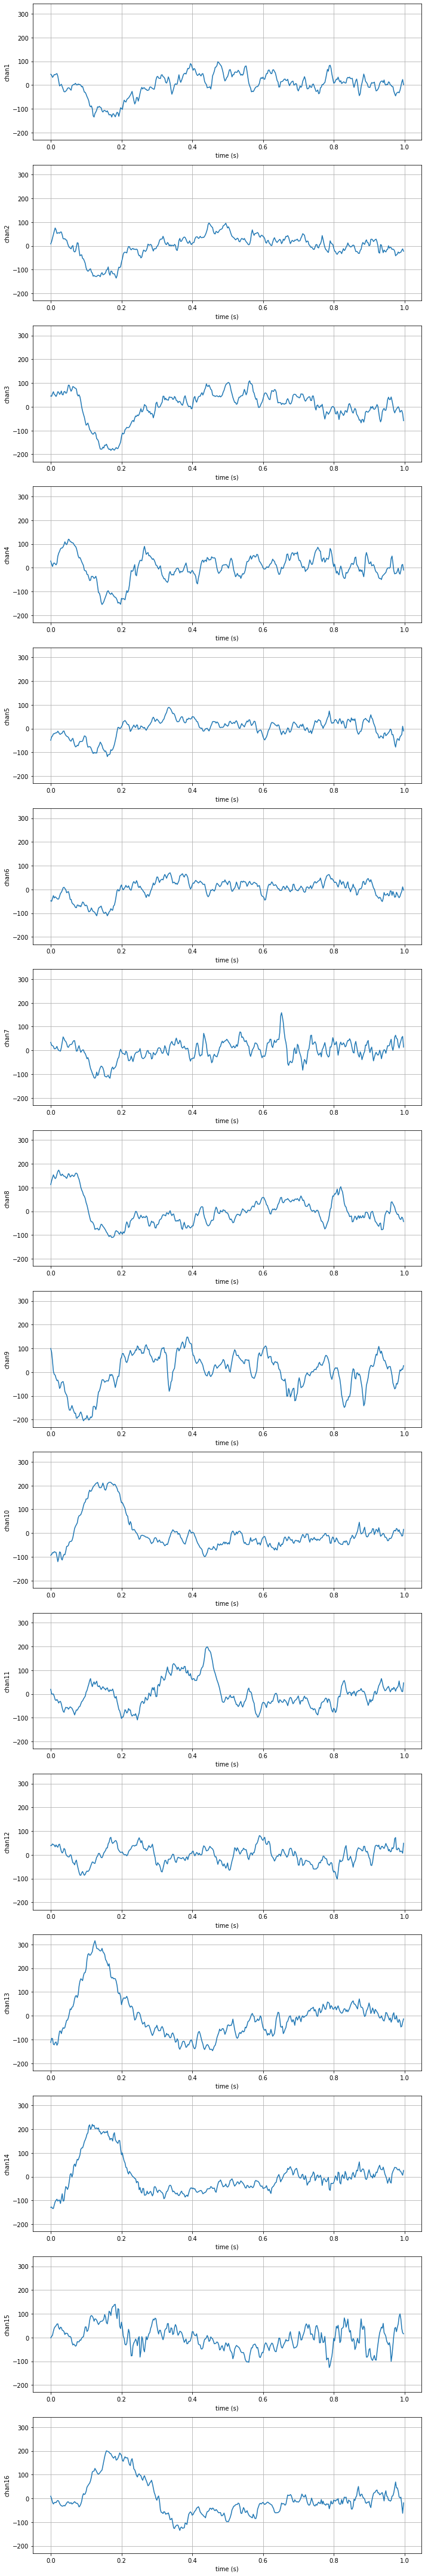

In [8]:
# plot channels individually
fig, axs = plt.subplots(len(channels), 1, figsize=(10,60), sharey=True) #, sharex='col'
fig.subplots_adjust(hspace=0.5)
for chan in range(len(channels)):
    axs[chan].plot(sample_df['time'], sample_df[channels[chan]])
    axs[chan].set_xlabel('time (s)')
    axs[chan].set_ylabel(channels[chan])
    axs[chan].grid(True)
# plt.xlabel('time (s)')
fig.tight_layout() 
plt.show()

### Visualize actual data for patient

In [9]:
#load the data
if plat=='Windows':
    os.chdir("C:\\Users\\mmado\\Downloads\\MLProject\\seizure_dataset\\competition_data\\clips\\Patient_8")
else:
    os.chdir("/Users/malvernmadondo/Downloads/Emory/spring20/ml/seizure_dataset/competition_data/clips/Patient_8")


In [10]:
folder_path = os.getcwd()
print(folder_path)
patient8_df = loadData("Patient_8_ictal_segment_180.mat")

C:\Users\mmado\Downloads\MLProject\seizure_dataset\competition_data\clips\Patient_8


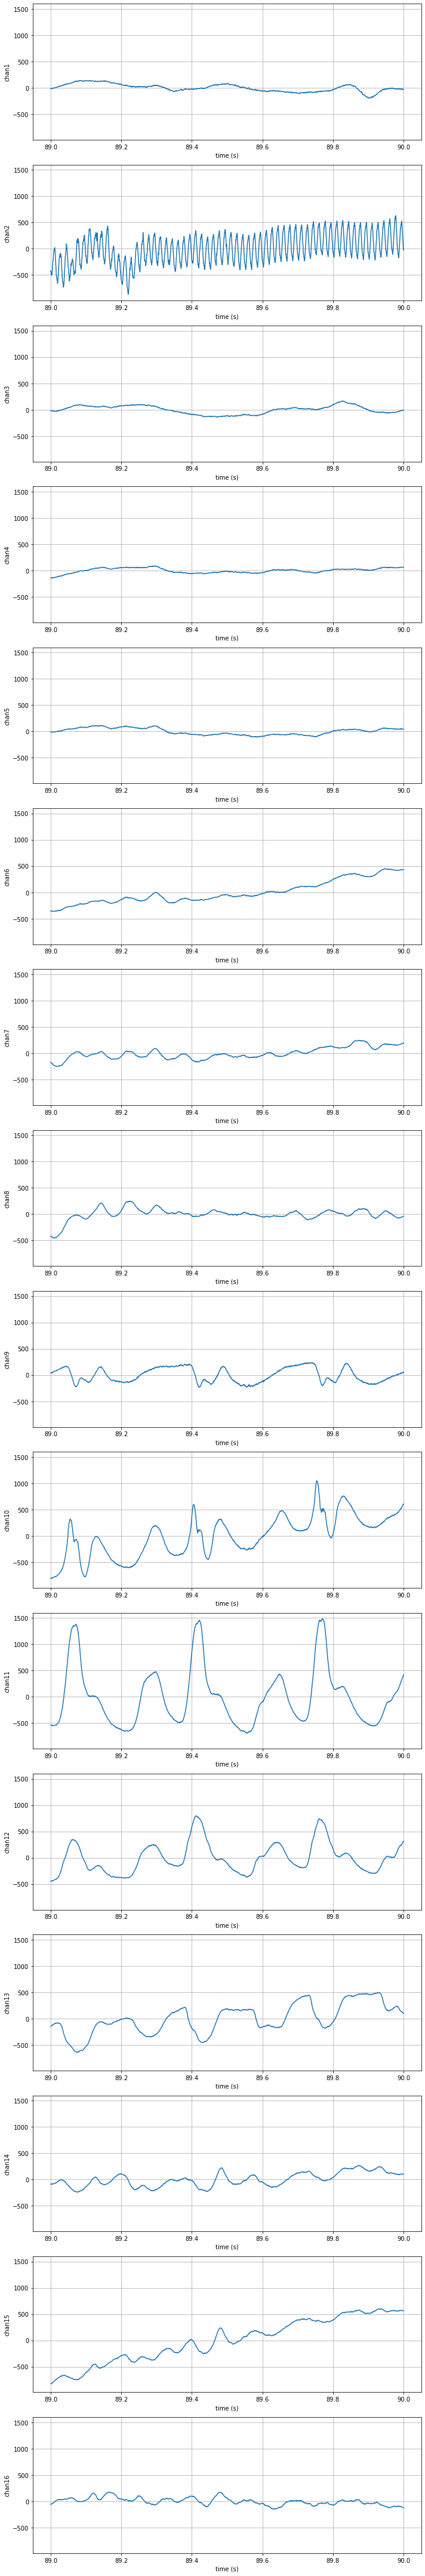

In [11]:
# plot channels individually
fig, axs = plt.subplots(len(channels), 1, figsize=(10,60), sharey=True) #, sharex='col'
fig.subplots_adjust(hspace=0.5)
for chan in range(len(channels)):
    axs[chan].plot(patient8_df['time'], patient8_df[channels[chan]])
    axs[chan].set_xlabel('time (s)')
    axs[chan].set_ylabel(channels[chan])
    axs[chan].grid(True)
# plt.xlabel('time (s)')
fig.tight_layout() 
plt.show()